In [407]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, precision_recall_curve, auc, roc_curve

#This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the
#Agaricus and Lepiota Family (pp. 500-525). Each species is identified as definitely edible, definitely poisonous, 
#or of unknown edibility and not recommended. This latter class was combined with the poisonous one. The Guide clearly
#states that there is no simple rule for determining the edibility of a mushroom; no rule like ``leaflets three, let it be'' for Poisonous Oak and Ivy.

#dataset o gljivama, klasifikacija:otrovne i jestive glive

#22 kategorička atributa, od toga jedan nema nikakav utjecaj na predikciju
#nema 0 vrijednosti

#Attribute Information:

#1. cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s 
#2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s 
#3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y 
#4. bruises?: bruises=t,no=f 
#5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s 
#6. gill-attachment: attached=a,descending=d,free=f,notched=n 
#7. gill-spacing: close=c,crowded=w,distant=d 
#8. gill-size: broad=b,narrow=n 
#9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y 
#10. stalk-shape: enlarging=e,tapering=t 
#11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=? 
#12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s 
#13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s 
#14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
#15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y 
#16. veil-type: partial=p,universal=u 
#17. veil-color: brown=n,orange=o,white=w,yellow=y 
#18. ring-number: none=n,one=o,two=t 
#19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z 
#20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y 
#21. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 
#22. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [408]:
df = pd.read_csv('mushrooms_dataset.csv')

In [409]:
df.describe(include='all').transpose()

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [410]:
#veil-type ima samo jednu kategoriju i nije nam relevantan
df = df.drop(["veil-type"], axis = 1)

In [411]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [412]:
df.shape

(8124, 22)

In [413]:
print(df.isnull().sum())
#nema nedostajućih vrijednosti

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [414]:
df['class'].value_counts()
#ovdje vidimo da imamo klasifikaciju gljiva na otrovne p(poisonous) i jestive e(edible)

e    4208
p    3916
Name: class, dtype: int64

In [383]:
y = df['class']
X = df.drop('class',axis=1)

In [384]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


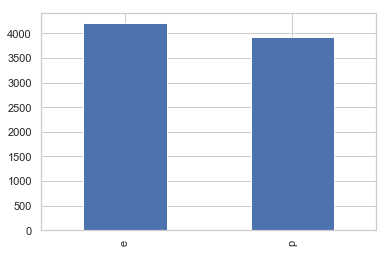

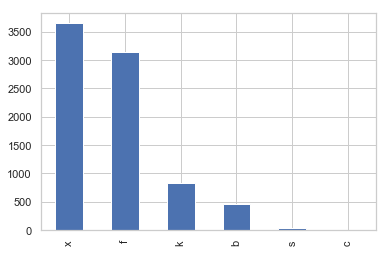

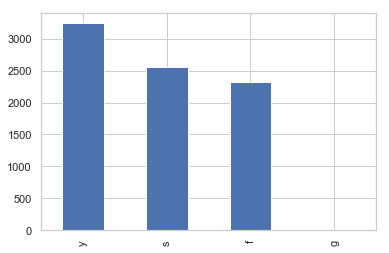

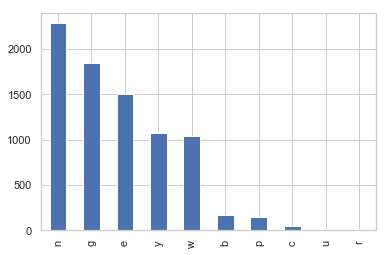

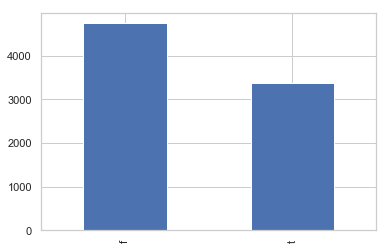

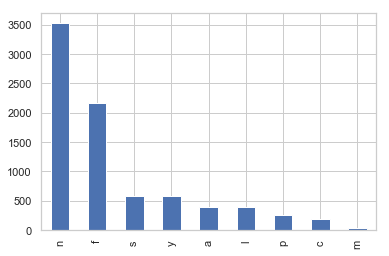

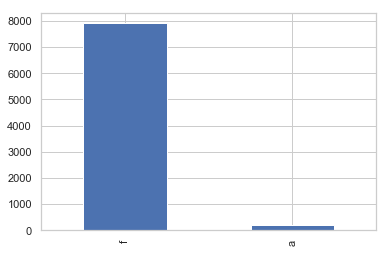

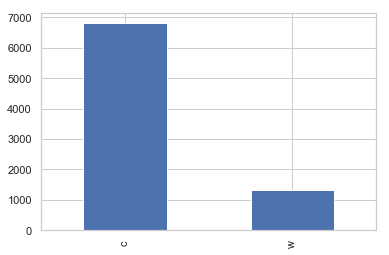

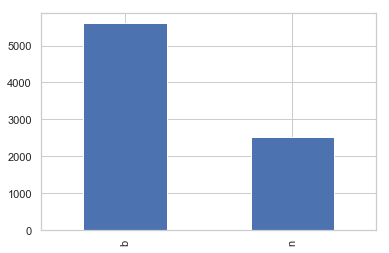

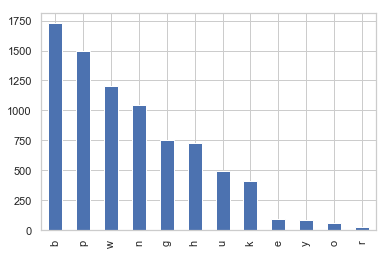

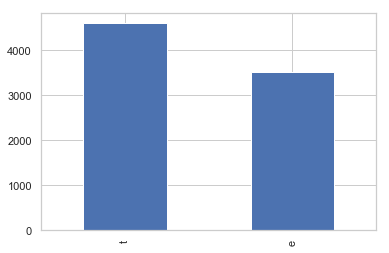

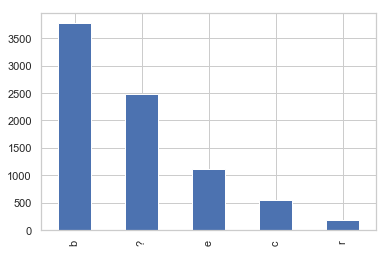

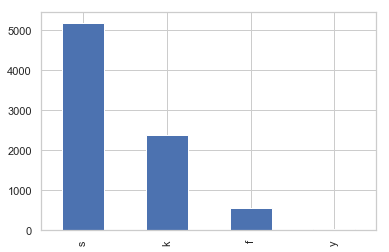

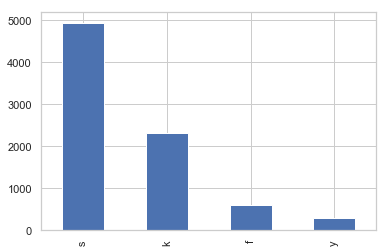

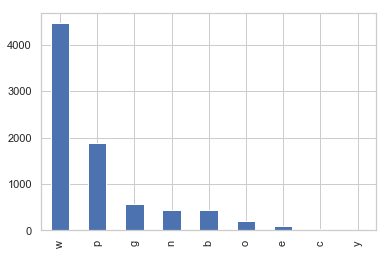

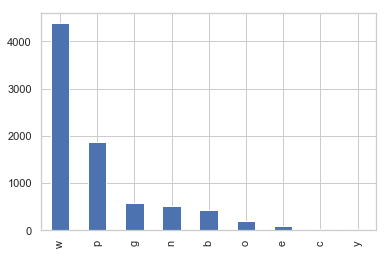

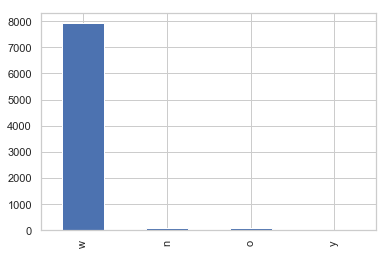

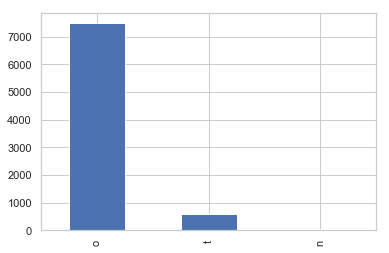

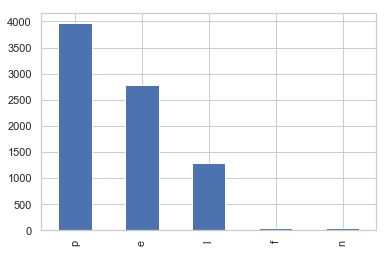

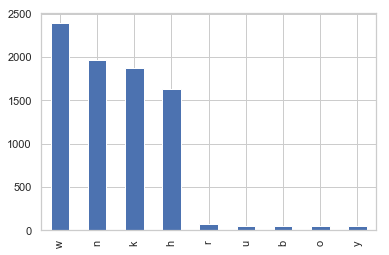

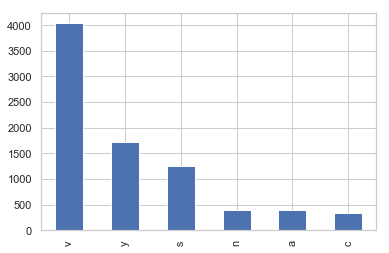

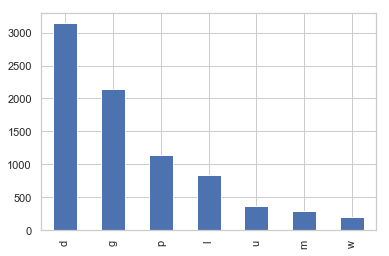

In [385]:
for i in range(df.shape[1]):
    df.iloc[:,i].value_counts().plot('bar')
    plt.show()

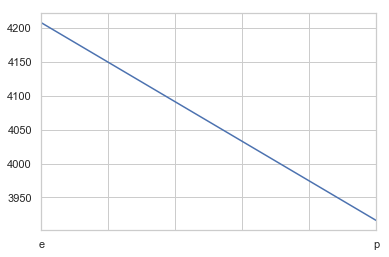

In [386]:
df['class'].value_counts().plot()

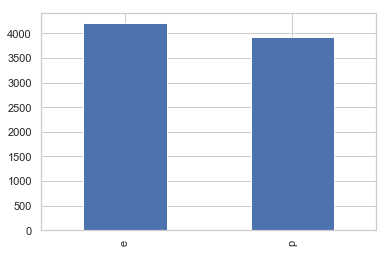

In [387]:
df['class'].value_counts().plot('bar')
#Podaci su kvalitetni,pravilno raspoređeni, bez nedostajućih vrijednosti, pogrešno napisanih podataka... čitki i uredni

In [392]:
num=df.select_dtypes(include=['object'])
num.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,s,w,w,w,o,e,n,a,g


In [394]:
df['target'] = df['class'].apply(lambda x : 1 if x == 'p' else 0)  # Convert to numeric
df = df.drop('class',axis=1)

In [395]:
#WOE, VI

import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [396]:
final_iv, IV = data_vars(df,df.target)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:93: RuntimeWarning: divide by zero encountered in log
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:94: RuntimeWarning: divide by zero encountered in log


In [397]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,cap-shape,b,b,452,48,0.106195,404,0.893805,0.012257,0.096008,-2.058297,0.277765
1,cap-shape,c,c,4,4,1.000000,0,0.000000,0.001021,0.000000,0.000000,0.277765
2,cap-shape,f,f,3152,1556,0.493655,1596,0.506345,0.397344,0.379278,0.046535,0.277765
3,cap-shape,k,k,828,600,0.724638,228,0.275362,0.153218,0.054183,1.039501,0.277765
4,cap-shape,s,s,32,0,0.000000,32,1.000000,0.000000,0.007605,0.000000,0.277765
5,cap-shape,x,x,3656,1708,0.467177,1948,0.532823,0.436159,0.462928,-0.059563,0.277765
6,cap-surface,f,f,2320,760,0.327586,1560,0.672414,0.194076,0.370722,-0.647206,0.158297
7,cap-surface,g,g,4,4,1.000000,0,0.000000,0.001021,0.000000,0.000000,0.158297
8,cap-surface,s,s,2556,1412,0.552426,1144,0.447574,0.360572,0.271863,0.282393,0.158297
9,cap-surface,y,y,3244,1740,0.536375,1504,0.463625,0.444331,0.357414,0.217674,0.158297


In [398]:
IV.sort_values('IV')

,VAR_NAME,IV
20,veil-color,0.001946
17,stalk-shape,0.041800
4,gill-attachment,0.095901
3,cap-surface,0.158297
1,cap-color,0.182628
11,ring-number,0.216054
2,cap-shape,0.277765
15,stalk-color-below-ring,0.457777
14,stalk-color-above-ring,0.617367
10,population,0.638265


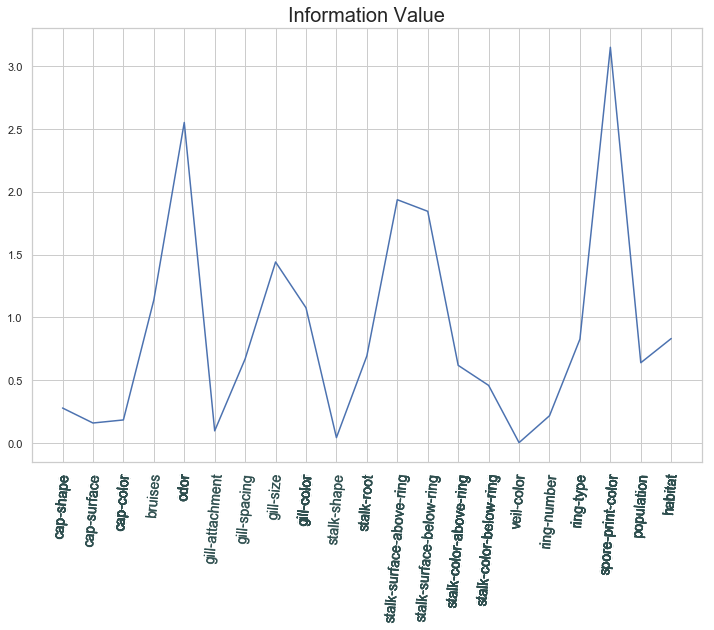

In [399]:
plt.figure(figsize=(12,8))
plt.plot(final_iv['VAR_NAME'], final_iv['IV'])
plt.title('Information Value', fontsize=20)
plt.xticks(final_iv['VAR_NAME'], rotation=85, fontsize=14, color='darkslategray' )
plt.show()

In [400]:
#If the IV statistic is:

#Less than 0.02, then the predictor is not useful for modeling (separating the Goods from the Bads)
#0.02 to 0.1, then the predictor has only a weak relationship to the Goods/Bads odds ratio
#0.1 to 0.3, then the predictor has a medium strength relationship to the Goods/Bads odds ratio
#0.3 to 0.5, then the predictor has a strong relationship to the Goods/Bads odds ratio.
#0.5, suspicious relationship (Check once)

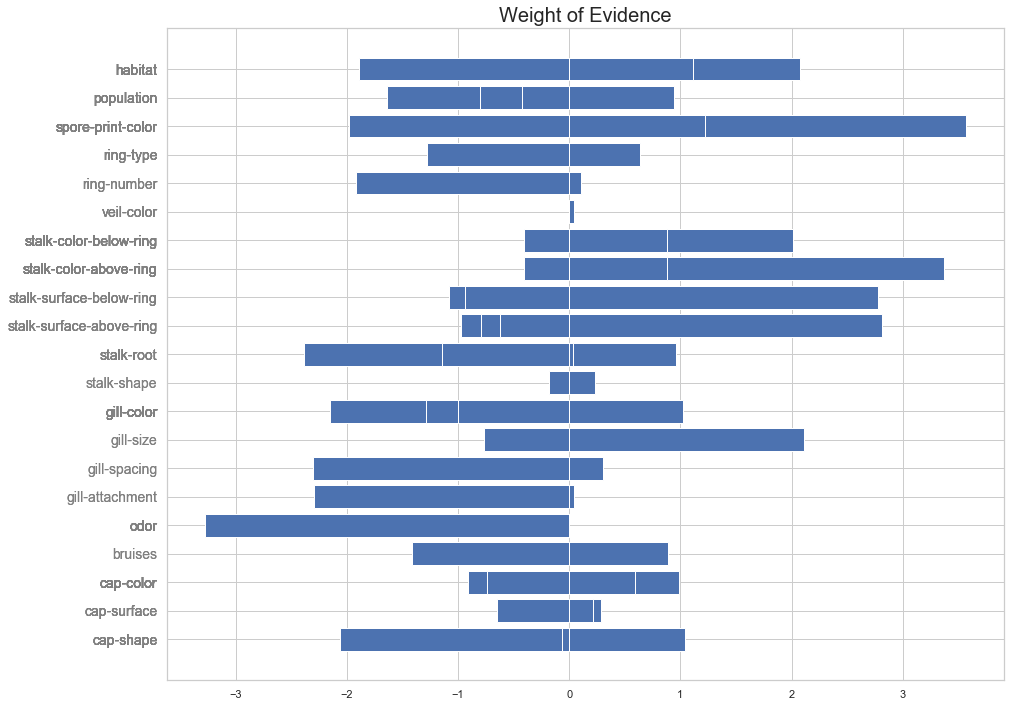

In [401]:
plt.figure(figsize=(15,12))
plt.barh(final_iv['VAR_NAME'],
            final_iv['WOE'])
plt.title('Weight of Evidence', fontsize=20)
plt.yticks(final_iv['VAR_NAME'], rotation=0, fontsize=14, color='grey' )
plt.show()

In [402]:
final_iv.sort_values('WOE',ascending=False)

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
95,spore-print-color,h,h,1632,1584,0.970588,48,0.029412,0.404494,0.011407,3.568424,3.150421
68,stalk-color-above-ring,n,n,448,432,0.964286,16,0.035714,0.110317,0.003802,3.367754,0.617367
57,stalk-surface-above-ring,k,k,2372,2228,0.939292,144,0.060708,0.568948,0.034221,2.810963,1.936461
61,stalk-surface-below-ring,k,k,2304,2160,0.937500,144,0.062500,0.551583,0.034221,2.779967,1.844145
36,gill-size,n,n,2512,2224,0.885350,288,0.114650,0.567926,0.068441,2.116019,1.440657
113,habitat,p,p,1144,1008,0.881119,136,0.118881,0.257406,0.032319,2.074985,0.831137
77,stalk-color-below-ring,n,n,512,448,0.875000,64,0.125000,0.114402,0.015209,2.017827,0.457777
101,spore-print-color,w,w,2388,1812,0.758794,576,0.241206,0.462717,0.136882,1.217996,3.150421
114,habitat,u,u,368,272,0.739130,96,0.260870,0.069459,0.022814,1.113371,0.831137
3,cap-shape,k,k,828,600,0.724638,228,0.275362,0.153218,0.054183,1.039501,0.277765


In [403]:
IV.sort_values('IV',ascending=False)

,VAR_NAME,IV
13,spore-print-color,3.150421
9,odor,2.551608
18,stalk-surface-above-ring,1.936461
19,stalk-surface-below-ring,1.844145
6,gill-size,1.440657
0,bruises,1.137555
5,gill-color,1.075668
8,habitat,0.831137
12,ring-type,0.826096
16,stalk-root,0.692726


In [404]:
final_iv.query('0.3<= IV <= 0.5')

#JEDINA VARIJABLA KOJA JE JAK PREDIKTOR JE stalk_color_below_ring

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
73,stalk-color-below-ring,b,b,432,432,1.000000,0,0.000000,0.110317,0.000000,0.000000,0.457777
74,stalk-color-below-ring,c,c,36,36,1.000000,0,0.000000,0.009193,0.000000,0.000000,0.457777
75,stalk-color-below-ring,e,e,96,0,0.000000,96,1.000000,0.000000,0.022814,0.000000,0.457777
76,stalk-color-below-ring,g,g,576,0,0.000000,576,1.000000,0.000000,0.136882,0.000000,0.457777
77,stalk-color-below-ring,n,n,512,448,0.875000,64,0.125000,0.114402,0.015209,2.017827,0.457777
78,stalk-color-below-ring,o,o,192,0,0.000000,192,1.000000,0.000000,0.045627,0.000000,0.457777
79,stalk-color-below-ring,p,p,1872,1296,0.692308,576,0.307692,0.330950,0.136882,0.882847,0.457777
80,stalk-color-below-ring,w,w,4384,1680,0.383212,2704,0.616788,0.429009,0.642586,-0.404022,0.457777
81,stalk-color-below-ring,y,y,24,24,1.000000,0,0.000000,0.006129,0.000000,0.000000,0.457777


In [469]:
final_iv.query('0.1<= IV <= 0.3')

#0.1 to 0.3
#AKO POGLEDAMO SREDNJU PREDIKTIVNU MOĆ- tu se ističu cap-shape, cap-surface, cap-color, ring-number

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,cap-shape,b,b,452,48,0.106195,404,0.893805,0.012257,0.096008,-2.058297,0.277765
1,cap-shape,c,c,4,4,1.000000,0,0.000000,0.001021,0.000000,0.000000,0.277765
2,cap-shape,f,f,3152,1556,0.493655,1596,0.506345,0.397344,0.379278,0.046535,0.277765
3,cap-shape,k,k,828,600,0.724638,228,0.275362,0.153218,0.054183,1.039501,0.277765
4,cap-shape,s,s,32,0,0.000000,32,1.000000,0.000000,0.007605,0.000000,0.277765
5,cap-shape,x,x,3656,1708,0.467177,1948,0.532823,0.436159,0.462928,-0.059563,0.277765
6,cap-surface,f,f,2320,760,0.327586,1560,0.672414,0.194076,0.370722,-0.647206,0.158297
7,cap-surface,g,g,4,4,1.000000,0,0.000000,0.001021,0.000000,0.000000,0.158297
8,cap-surface,s,s,2556,1412,0.552426,1144,0.447574,0.360572,0.271863,0.282393,0.158297
9,cap-surface,y,y,3244,1740,0.536375,1504,0.463625,0.444331,0.357414,0.217674,0.158297


In [334]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,4,9,9,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,s,w,w,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,5176,4936,4464,4384,7924,7488,3968,2388,4040,3148


In [335]:
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])
    #kako bismo mogli izračunati linearnu regresiju sve podatke treba prebaciti u numeričke

In [336]:
sorted(df)

['bruises',
 'cap-color',
 'cap-shape',
 'cap-surface',
 'class',
 'gill-attachment',
 'gill-color',
 'gill-size',
 'gill-spacing',
 'habitat',
 'odor',
 'population',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'stalk-root',
 'stalk-shape',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'veil-color']

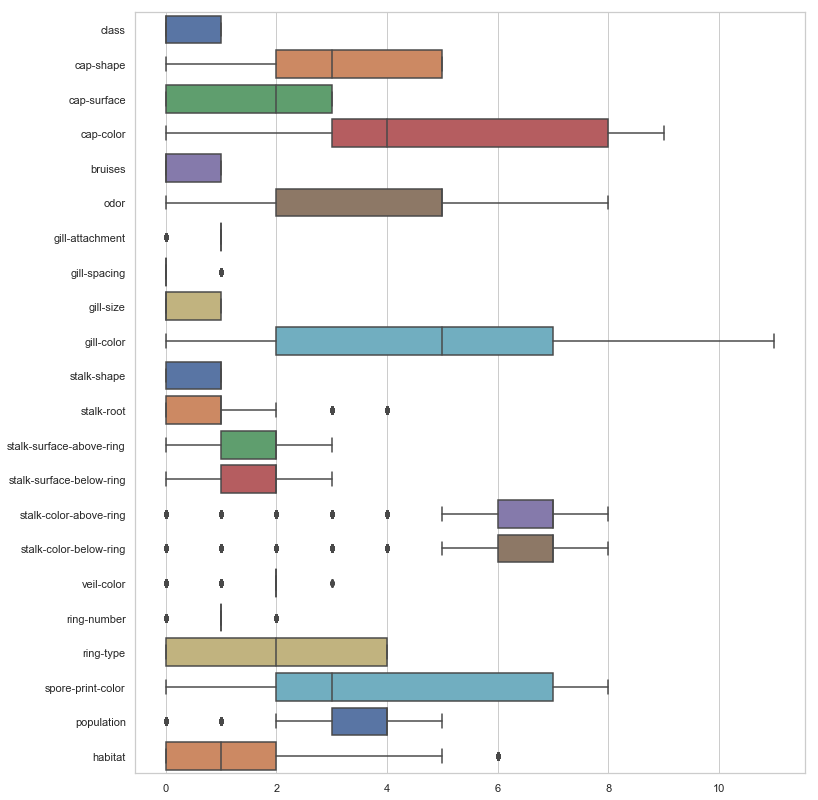

In [365]:
sns.set(rc={'figure.figsize':(12,14)})
sns.set_style("whitegrid")
sns.boxplot(data=df, palette="deep", orient="h")


#outlayeri
#gill-color i cap-color imaju širok raspon outlayera

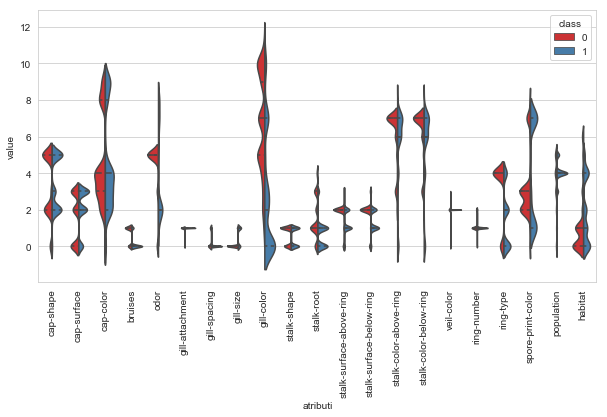

In [338]:
#distribucija vrijednosti


#f, ax = plt.subplots()
#sns.violinplot(data=data)


df_div = pd.melt(df, "class", var_name="atributi")
fig, ax = plt.subplots(figsize=(10,5))
p = sns.violinplot(ax = ax, x="atributi", y="value", hue="class", split = True, data=df_div, inner = 'quartile', palette = 'Set1')
df_no_class = df.drop(["class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns));

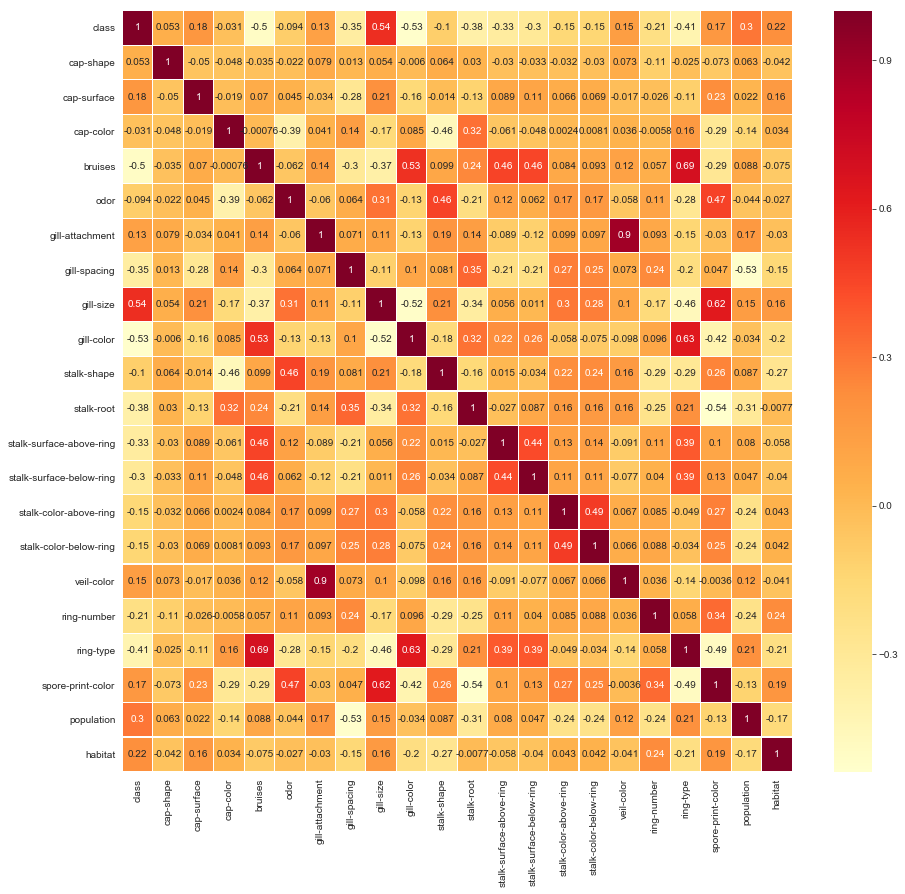

In [339]:
#heatmapa
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlOrRd", annot=True)
plt.yticks(rotation=0);

In [340]:
df_predict=df.filter([ 'gill-spacing',
       'gill-color', 'spore-print-color','stalk-root','ring-type','veil-color','gill-attachment','bruises'])
df_predict.head(20)

,gill-spacing,gill-color,spore-print-color,stalk-root,ring-type,veil-color,gill-attachment,bruises
0,0,4,2,3,4,2,1,1
1,0,4,3,2,4,2,1,1
2,0,5,3,2,4,2,1,1
3,0,5,2,3,4,2,1,1
4,1,4,3,3,0,2,1,0
5,0,5,2,2,4,2,1,1
6,0,2,2,2,4,2,1,1
7,0,5,3,2,4,2,1,1
8,0,7,2,3,4,2,1,1
9,0,2,2,2,4,2,1,1


In [341]:
#koorelacije

df_predict.corr()

,gill-spacing,gill-color,spore-print-color,stalk-root,ring-type,veil-color,gill-attachment,bruises
gill-spacing,1.000000,0.100193,0.047323,0.350548,-0.195897,0.073363,0.071489,-0.299473
gill-color,0.100193,1.000000,-0.416135,0.315080,0.629398,-0.097583,-0.128567,0.527120
spore-print-color,0.047323,-0.416135,1.000000,-0.536996,-0.487048,-0.003600,-0.029524,-0.285008
stalk-root,0.350548,0.315080,-0.536996,1.000000,0.210155,0.156213,0.144063,0.244188
ring-type,-0.195897,0.629398,-0.487048,0.210155,1.000000,-0.143673,-0.146689,0.692973
veil-color,0.073363,-0.097583,-0.003600,0.156213,-0.143673,1.000000,0.897518,0.119770
gill-attachment,0.071489,-0.128567,-0.029524,0.144063,-0.146689,0.897518,1.000000,0.137359
bruises,-0.299473,0.527120,-0.285008,0.244188,0.692973,0.119770,0.137359,1.000000


In [342]:
df['class'].value_counts()

0    4208
1    3916
Name: class, dtype: int64

In [ ]:
#dummyiji

In [343]:
dummy_coll=pd.get_dummies(df['class'])
dummy_coll.columns = ['class_p', 'class_e']
dummy_coll.head()

,class_p,class_e
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [344]:
df_new_dummy=df_predict.merge(dummy_coll, left_index=True, right_index=True)
df_new_dummy.head()

,gill-spacing,gill-color,spore-print-color,stalk-root,ring-type,veil-color,gill-attachment,bruises,class_p,class_e
0,0,4,2,3,4,2,1,1,0,1
1,0,4,3,2,4,2,1,1,1,0
2,0,5,3,2,4,2,1,1,1,0
3,0,5,2,3,4,2,1,1,0,1
4,1,4,3,3,0,2,1,0,1,0


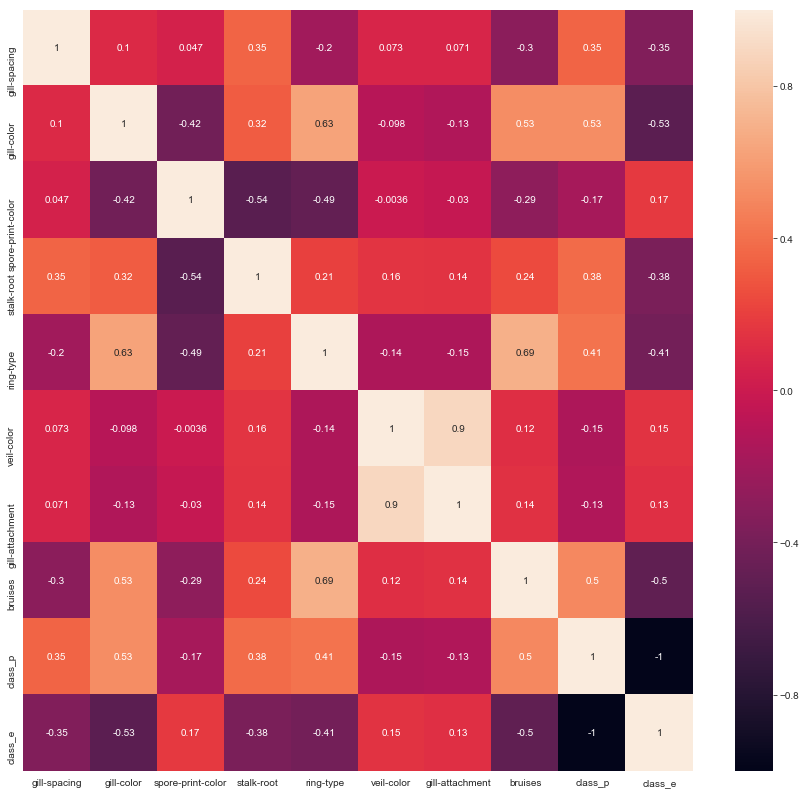

In [347]:
plt.figure(figsize=(15,14))
sns.heatmap(df_new_dummy.corr(),annot=True);

In [427]:
for i in range(df.shape[1]):
    print(df.iloc[:,i].value_counts())
    
    #frekvencija

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64
No         4748
Bruises    3376
Name: bruises, dtype: int64
None        3528
Foul        2160
Spicy        576
Fishy        576
Almond       400
Anise        400
Pungent      256
Creosote     192
Musty         36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-

In [430]:
bruises_class = {"t": "bruises", "f": "No"} #bruises=t,no=f 
df['bruises'] = df['bruises'].apply(lambda x:bruises_class[x])

KeyError: 'Bruises'

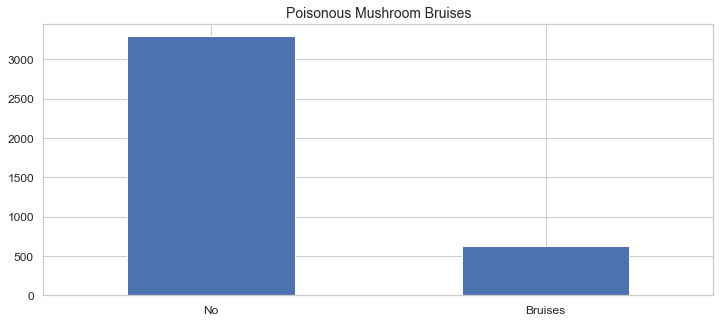

In [431]:
Poisonous_Bruises = df[df['class']== 'p']['bruises'].value_counts()
Bruises_p = Poisonous_Bruises.plot(kind='bar',figsize=(12,5),fontsize=12)
Bruises_p.set_title('Poisonous Mushroom Bruises',fontsize=14)
Bruises_p.tick_params(labelrotation=0)

#we can see that small amount of poisonous mushrooms have bruises

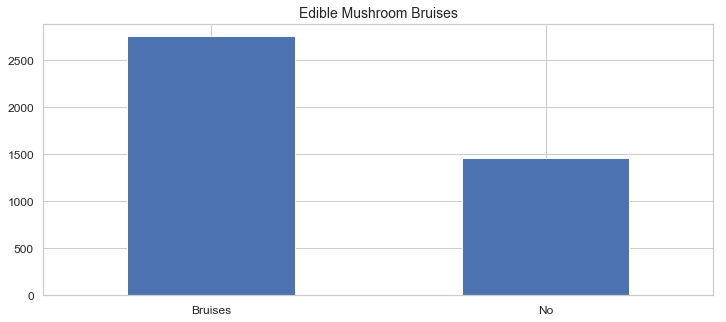

In [433]:
Edible_Bruises = df[df['class']== 'e']['bruises'].value_counts()
Bruises_e = Edible_Bruises.plot(kind='bar',figsize=(12,5),fontsize=12)
Bruises_e.set_title('Edible Mushroom Bruises',fontsize=14)
Bruises_e.tick_params(labelrotation=0)

#Edible mushrooms have bigger rate of bruises

In [432]:
odor_class = {"a": "Almond", "l": "Anise", "c": "Creosote", "y": "Fishy", "f": "Foul", "m": "Musty", "n": "None", "p": "Pungent", "s": "Spicy"} 
df['odor'] = df['odor'].apply(lambda x:odor_class[x])

KeyError: 'Pungent'

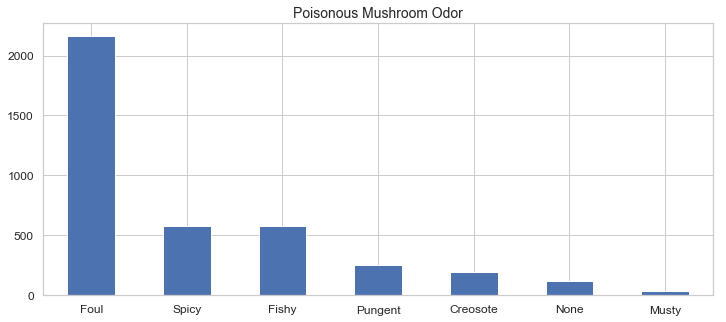

In [440]:
Poisonous_Odor = df[df['class']=='p']['odor'].value_counts()

# graf
ordor_p = Poisonous_Odor.plot(kind='bar',figsize=(12,5),fontsize=12)
ordor_p.set_title('Poisonous Mushroom Odor',fontsize=14)
ordor_p.tick_params(labelrotation=0)

#most poisonous mushrooms have foul scent, none of them have anise or almond scent

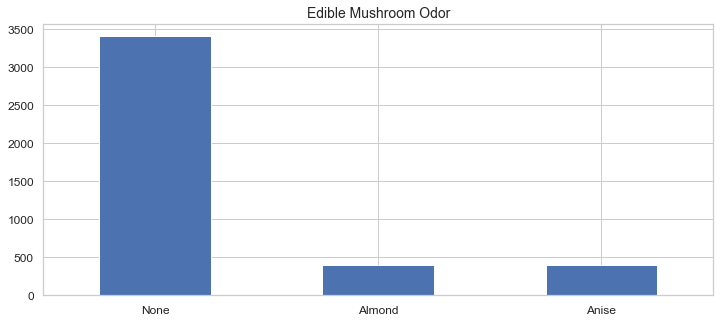

In [441]:
Edible_Odor = df[df['class']=='e']['odor'].value_counts()

ordor_e = Edible_Odor.plot(kind='bar',figsize=(12,5),fontsize=12)
ordor_e.set_title('Edible Mushroom Odor',fontsize=14)
ordor_e.tick_params(labelrotation=0)

#edible mushrooms mostly have no scent

In [446]:
veil_color_class = {"n": "Brown", "o": "Orange", "w": "White", "y": "Yellow"} 
df['veil-color'] = df['veil-color'].apply(lambda x:veil_color_class[x])
# veil-color: brown=n,orange=o,white=w,yellow=y 

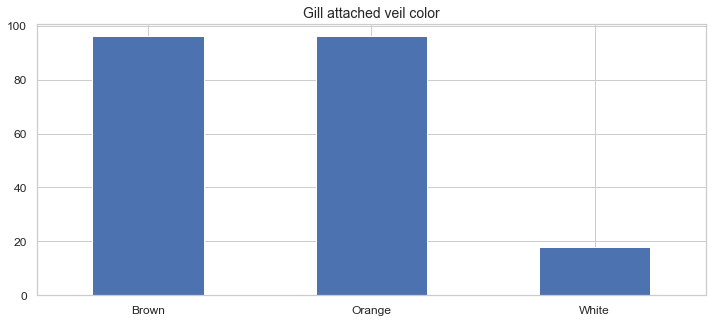

In [449]:

Veil_color = df[df['gill-attachment']=='a']['veil-color'].value_counts()

# graf
veil_attached = Veil_color.plot(kind='bar',figsize=(12,5),fontsize=12)
veil_attached.set_title('Gill attached veil color',fontsize=14)
veil_attached.tick_params(labelrotation=0)



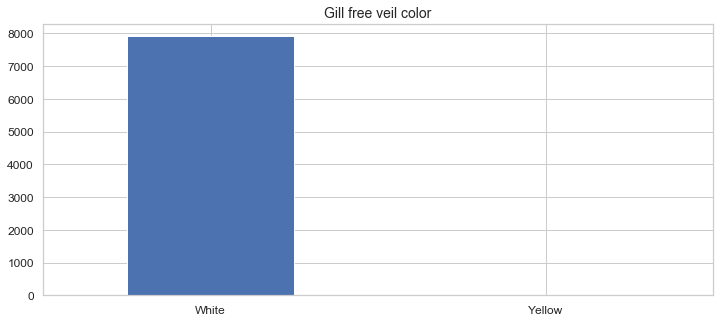

In [452]:
#heat map showed strong conection beetween veil_color and gill_attachment
Veil_color = df[df['gill-attachment']=='f']['veil-color'].value_counts()

# graf
veil_gill_free = Veil_color.plot(kind='bar',figsize=(12,5),fontsize=12)
veil_gill_free.set_title('Gill free veil color',fontsize=14)
veil_gill_free.tick_params(labelrotation=0)
#we can see that free gill attachment has no yellow veil color

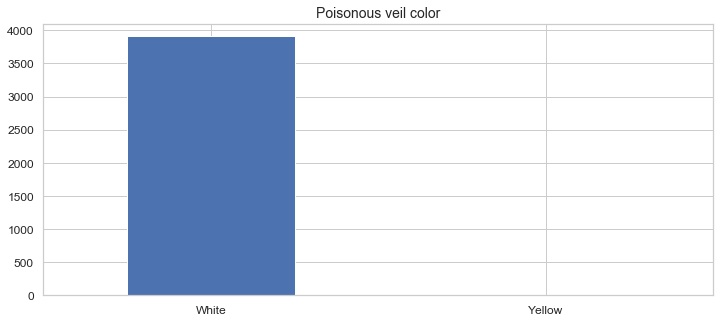

In [454]:

Veil_color = df[df['class']=='p']['veil-color'].value_counts()

# graf
veil_p = Veil_color.plot(kind='bar',figsize=(12,5),fontsize=12)
veil_p.set_title('Poisonous veil color',fontsize=14)
veil_p.tick_params(labelrotation=0)
# also connection bettween poisonous mushhrooms and veil color

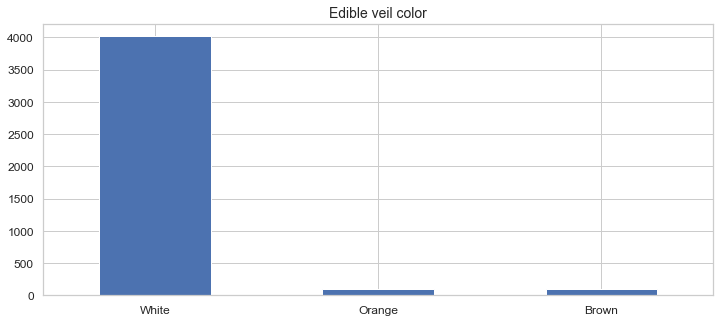

In [455]:
Veil_color = df[df['class']=='e']['veil-color'].value_counts()

# graf
veil_e = Veil_color.plot(kind='bar',figsize=(12,5),fontsize=12)
veil_e.set_title('Edible veil color',fontsize=14)
veil_e.tick_params(labelrotation=0)
# also connection bettween poisonous mushhrooms and veil color

In [465]:
population_class = {"a": "Abundant", "c": "Clustered", "n": "Numerous", "s": "Scattered","v": "Several", "y": "Solitary"} 
df['population'] = df['population'].apply(lambda x:habitat_class[x])


# population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y 

KeyError: 'Scattered'

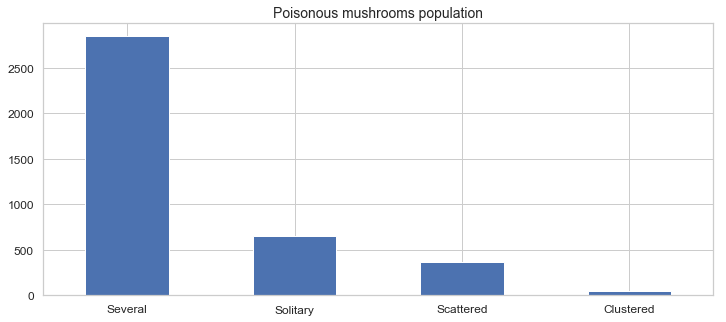

In [466]:
Population = df[df['class']=='p']['population'].value_counts()

# graf
population_p = Population.plot(kind='bar',figsize=(12,5),fontsize=12)
population_p.set_title('Poisonous mushrooms population',fontsize=14)
population_p.tick_params(labelrotation=0)

#most poisonous mushroom have several population

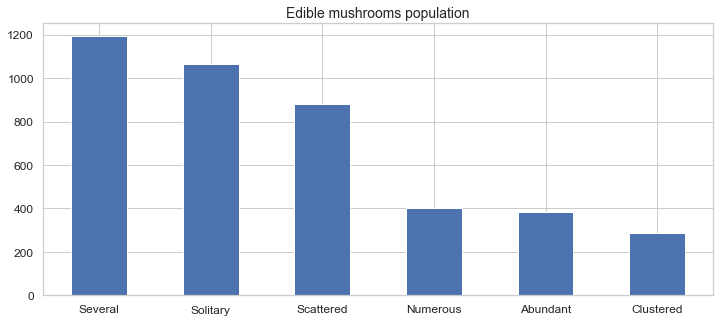

In [467]:
Population = df[df['class']=='e']['population'].value_counts()

# graf
population_e = Population.plot(kind='bar',figsize=(12,5),fontsize=12)
population_e.set_title('Edible mushrooms population',fontsize=14)
population_e.tick_params(labelrotation=0)

In [ ]:
#vizualizacija varijabli

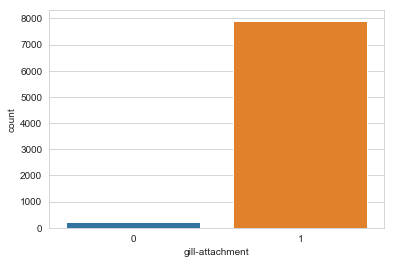

In [245]:
sns.countplot(x='gill-attachment',data=df)

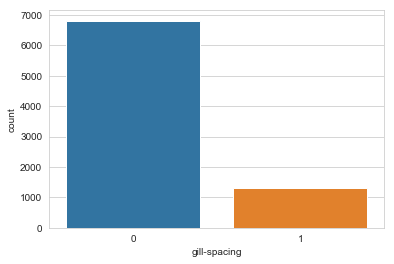

In [246]:
sns.countplot(x='gill-spacing',data=df)

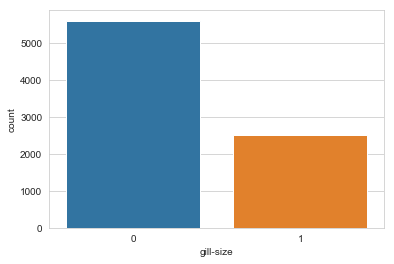

In [247]:
sns.countplot(x='gill-size',data=df)

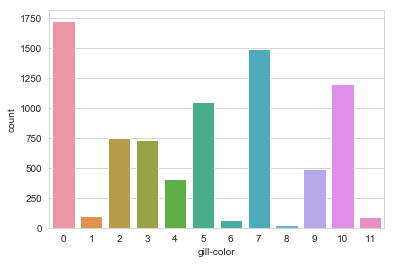

In [248]:
sns.countplot(x='gill-color',data=df)

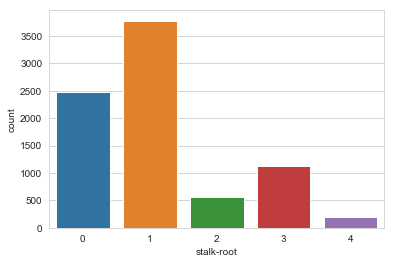

In [249]:
sns.countplot(x='stalk-root',data=df)

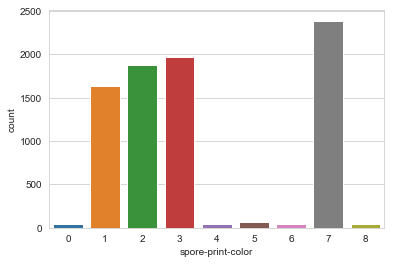

In [250]:
sns.countplot(x='spore-print-color',data=df)

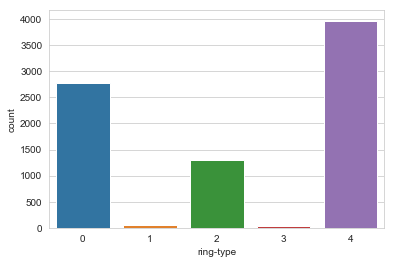

In [251]:
sns.countplot(x='ring-type',data=df)

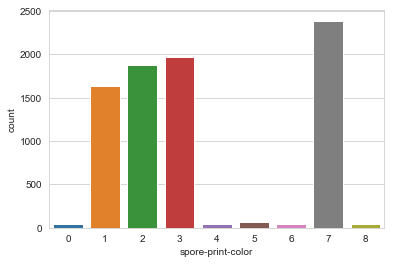

In [252]:
sns.countplot(x='spore-print-color',data=df)

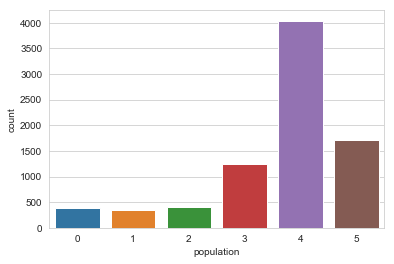

In [253]:
sns.countplot(x='population',data=df)

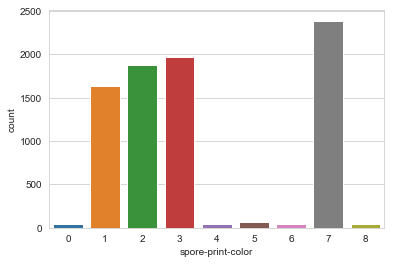

In [254]:
sns.countplot(x='spore-print-color',data=df)

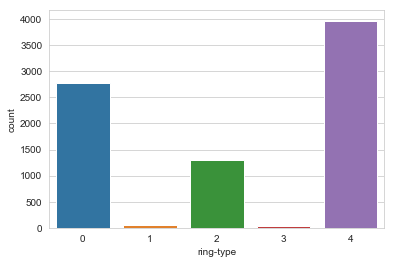

In [255]:
sns.countplot(x='ring-type',data=df)

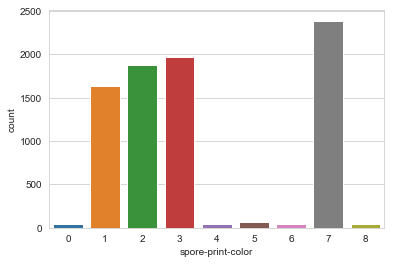

In [256]:
sns.countplot(x='spore-print-color',data=df)

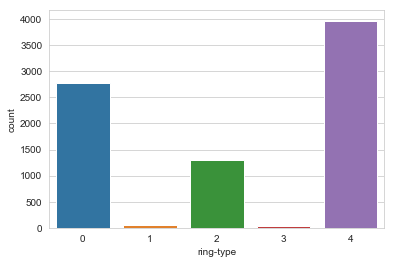

In [257]:
sns.countplot(x='ring-type',data=df)

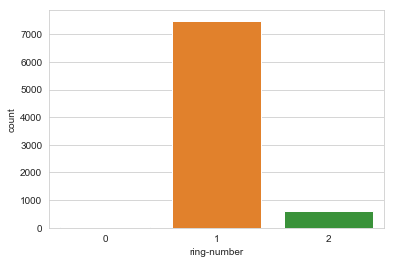

In [258]:
sns.countplot(x='ring-number',data=df)

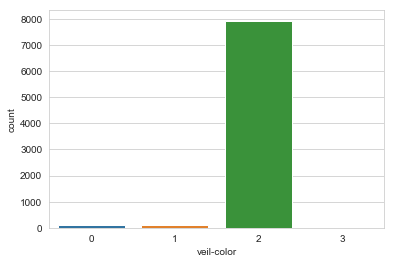

In [259]:
sns.countplot(x='veil-color',data=df)

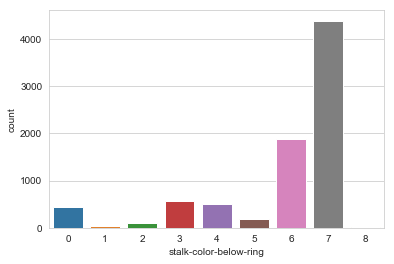

In [260]:
sns.countplot(x='stalk-color-below-ring',data=df)

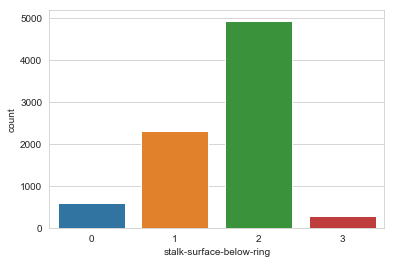

In [261]:
sns.countplot(x='stalk-surface-below-ring',data=df)

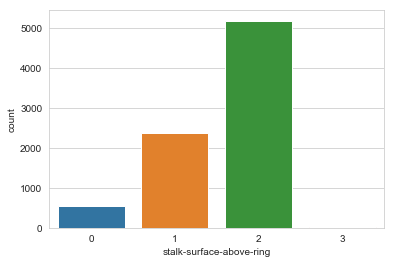

In [262]:
sns.countplot(x='stalk-surface-above-ring',data=df)

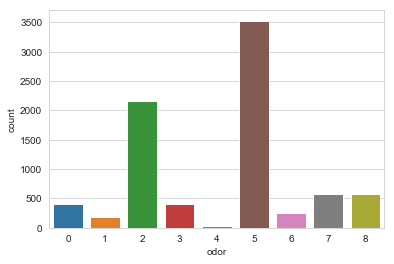

In [263]:
sns.countplot(x='odor', data=df)

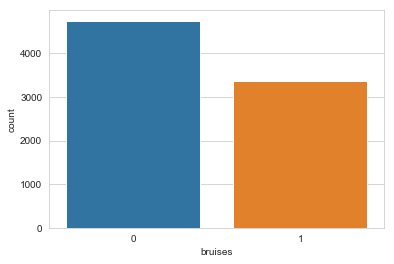

In [264]:
sns.countplot(x='bruises',data=df)

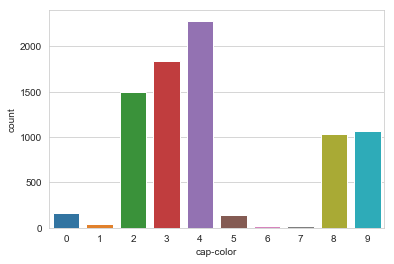

In [265]:
sns.countplot(x='cap-color',data=df)

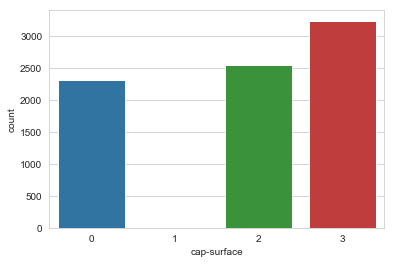

In [266]:
sns.countplot(x='cap-surface',data=df)

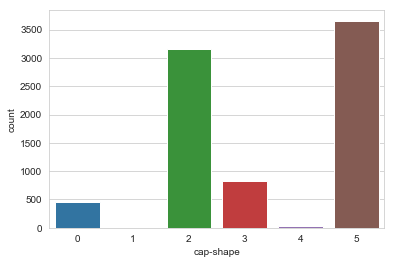

In [267]:
sns.countplot(x='cap-shape',data=df)

In [268]:
X.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [269]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 21 columns):
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-color                  8124 non-null object
ring-number                 8124 non-null object
ring-type                   8124 non-null object
spore-print

In [270]:
df['class'].value_counts().sum()

8124

In [271]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
class                       8124 non-null int64
cap-shape                   8124 non-null int32
cap-surface                 8124 non-null int32
cap-color                   8124 non-null int32
bruises                     8124 non-null int32
odor                        8124 non-null int32
gill-attachment             8124 non-null int32
gill-spacing                8124 non-null int32
gill-size                   8124 non-null int32
gill-color                  8124 non-null int32
stalk-shape                 8124 non-null int32
stalk-root                  8124 non-null int32
stalk-surface-above-ring    8124 non-null int32
stalk-surface-below-ring    8124 non-null int32
stalk-color-above-ring      8124 non-null int32
stalk-color-below-ring      8124 non-null int32
veil-color                  8124 non-null int32
ring-number                 8124 non-null int32
ring-type                   8

In [272]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [273]:
df['class'] = le.fit_transform(df['class'])

In [274]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1


In [275]:
y = pd.DataFrame(df['class'],columns=['class'])

In [276]:
y.head()

,class
0,1
1,0
2,0
3,1
4,0


In [299]:
X = df.drop('class',axis=1,inplace=True)

In [300]:
X = df

In [301]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,2,7,7,2,1,0,3,0,1


In [302]:
y.head()

,class
0,1
1,0
2,0
3,1
4,0


In [303]:
X_enc=pd.get_dummies(X)

In [304]:
X_enc.columns

Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [305]:
from sklearn.preprocessing import StandardScaler

In [306]:
sc = StandardScaler()

In [307]:
X_std = sc.fit_transform(X_enc)

C:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Anaconda\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [476]:
X = pd.DataFrame(X_std,columns=['cap-shape','cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'])
        
        
       
        

In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [310]:
#LOGISTIČKA REGRESIJA- koristi se za probleme klasifikacije- two class classification

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [311]:
lr.fit(X_train,y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [312]:
print("Točnost:", lr.score(X_test, y_test)*100)


Točnost: 95.93846153846154


In [313]:
from sklearn.metrics import classification_report

In [314]:
pred = lr.predict(X_test)

In [315]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       844
           1       0.96      0.96      0.96       781

   micro avg       0.96      0.96      0.96      1625
   macro avg       0.96      0.96      0.96      1625
weighted avg       0.96      0.96      0.96      1625



In [357]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.96


In [354]:
#confusion matrix

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,pred)
print(confusion_matrix)

[[812  34]
 [ 32 747]]


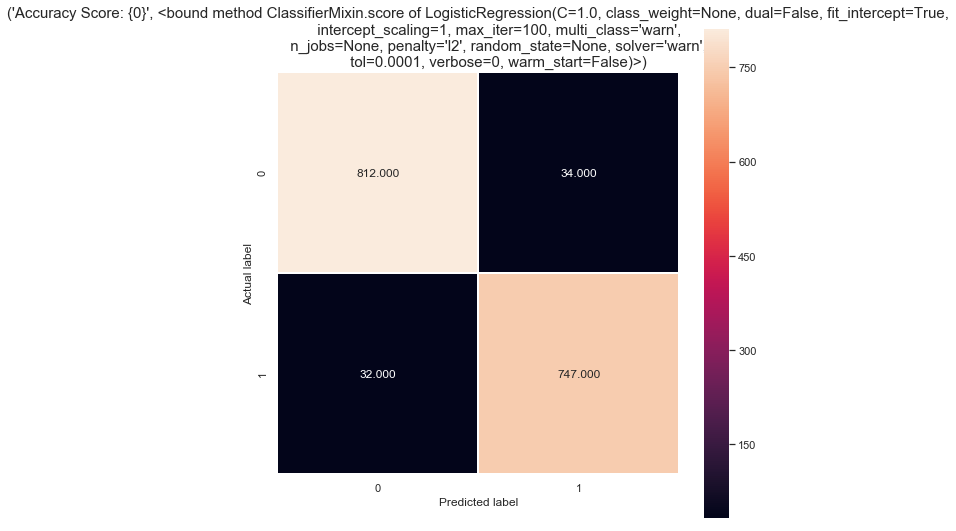

In [371]:
plt.figure(figsize=(9,9))
sns.heatmap(c_matrix, annot=True, fmt=".3f", linewidths=.5, square = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}',lr.score
plt.title(all_sample_title, size = 15);

#812 i 747 su točne pretpostavke, 32 i 34 netočne, idealno bi bilo da su nula

In [316]:
y_pred=lr.predict(X_test)

In [317]:
from sklearn.naive_bayes import GaussianNB

metoda_GNB = GaussianNB()
metoda_GNB = metoda_GNB.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [318]:
y_pred_GNB=metoda_GNB.predict(X_test)

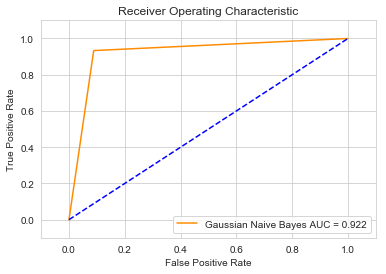

In [319]:
#ROC curve

def roc_curve_acc(y_test, y_pred,method):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color='darkorange',label='%s AUC = %0.3f'%(method, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.ylim([-0.1, 1.1])
    plt.xlim([-0.1, 1.1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    
roc_curve_acc(y_test, y_pred_GNB, "Gaussian Naive Bayes")


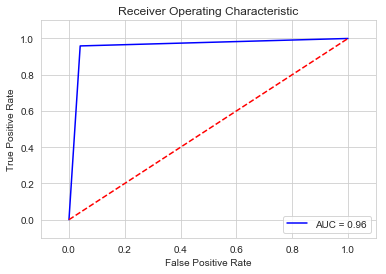

In [359]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
#auc =0.96 je dobar rezultat, performansa testa je zadovoljavajuća
#idealan rezultat bi bio 1